# Diabetics Prediction

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [60]:
df = pd.read_csv("C:/Users/Richard/Desktop/diabetes_prediction_dataset.csv")  #use your dataset location

In [61]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Checking number of row and columm

In [62]:
df.shape

(100000, 9)

# Checking for null values 

In [63]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Checking smoking history types

In [64]:
df["smoking_history"].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

<Axes: xlabel='smoking_history'>

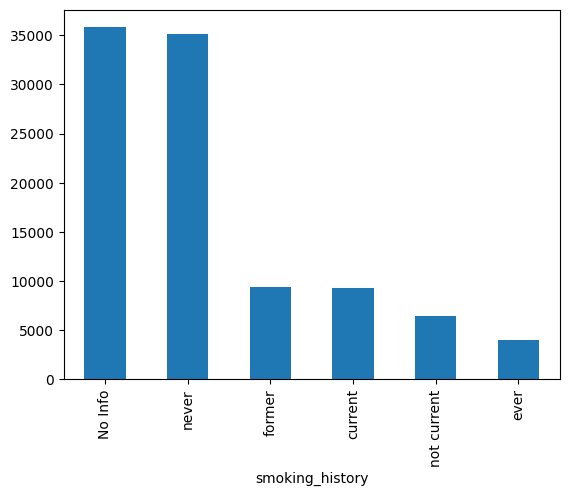

In [65]:
df["smoking_history"].value_counts().plot.bar()

# Data Analysis

In [87]:
cols = ["age","hypertension","heart_disease","bmi"]

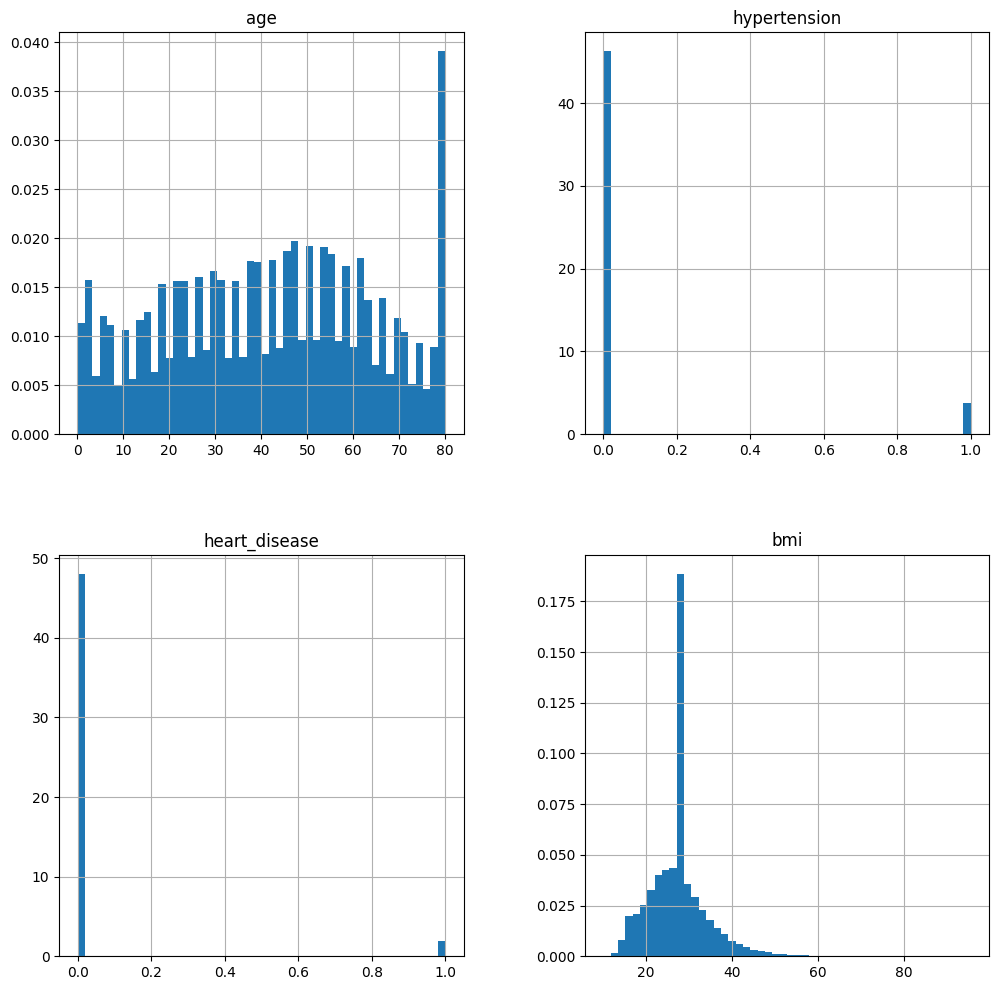

In [88]:
df[cols].hist(bins=50,density=True,figsize=(12,12))
plt.show()

# Changing Catagorical values to Numeric

In [68]:
le = LabelEncoder()

In [69]:
# Encoding 'gender' column
df["gender"] = le.fit_transform(df["gender"])

In [70]:
# Encoding 'smoking_history' column
df["smoking_history"] = le.fit_transform(df["smoking_history"])

In [71]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


# Dividing train and test data

In [72]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Data Scalling

In [74]:
sc = StandardScaler()

In [75]:
sc.fit(x_train)

StandardScaler()

In [76]:
x_train_scalled = sc.fit_transform(x_train)
x_test_scalled = sc.fit_transform(x_test)

In [77]:
# converting back to Dataframe

x_train_scalled = pd.DataFrame(x_train_scalled, columns=x_train.columns)
x_test_scalled = pd.DataFrame(x_test_scalled, columns=x_test.columns)

In [78]:
x_train_scalled.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,-1.683236,-0.285439,-0.203159,0.961925,0.000467,-1.895565,1.519959
1,-0.750871,-0.285439,-0.203159,-1.155031,0.000467,-0.494029,-1.426426
2,1.247056,3.503370,4.922259,-0.096553,2.451910,1.374684,0.537831
3,0.714275,-0.285439,-0.203159,-0.625792,0.502515,0.253456,-1.426426
4,1.691039,-0.285439,-0.203159,-1.155031,0.000467,-0.961208,0.488724


# Predicting using logistic Regression

In [79]:
# Creating object 
lr = LogisticRegression()

In [80]:
lr.fit(x_train,y_train)

C:\Users\Richard\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
# Predecting result using x_test
yPred = lr.predict(x_test)

In [82]:
lr.score(x_test, y_test)

0.9575

In [83]:
accuracy_score(y_test,yPred)*100

95.75

# Predicting using KNN

In [109]:
knn = KNeighborsClassifier(n_neighbors=4)

In [110]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [111]:
yPredKNN = knn.predict(x_test)

In [112]:
accuracy_score(y_test,yPredKNN)*100

95.545

# Accuracy Score

In [113]:
print("Logistric Regression model accuracy is ",accuracy_score(y_test,yPred)*100,"%")
print("KNN model accuracy is ",accuracy_score(y_test,yPredKNN)*100,"%")


Logistric Regression model accuracy is  95.33500000000001 %
KNN model accuracy is  95.545 %
